# LINEAR REGRESSION

# Importing the libraries

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import linear_model

In [23]:
pd.set_option('display.max_rows',None)


# Importing the dataset

In [24]:
plst = pd.read_csv('car data.csv')
plst

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.590,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.540,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.850,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.150,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.870,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.830,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.120,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.610,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.890,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.920,42367,Diesel,Dealer,Manual,0


In [25]:
plst['Car_Name'].value_counts()

city                         26
corolla altis                16
verna                        14
fortuner                     11
brio                         10
ciaz                          9
innova                        9
i20                           9
grand i10                     8
jazz                          7
amaze                         7
Royal Enfield Classic 350     7
ertiga                        6
eon                           6
sx4                           6
alto k10                      5
i10                           5
swift                         5
Bajaj Pulsar 150              4
Royal Enfield Thunder 350     4
ritz                          4
wagon r                       4
etios liva                    4
dzire                         4
xcent                         3
etios cross                   3
Royal Enfield Thunder 500     3
TVS Apache RTR 160            3
Yamaha FZ S V 2.0             3
creta                         3
Honda CB Hornet 160R          3
etios g 

In [26]:
plst['Fuel_Type'].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [27]:
# replacing the string element to numeric

plst['Fuel_Type'].replace(['Petrol','Diesel','CNG'],[1,2,3],inplace=True)

In [47]:
plst.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,1,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,2,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,1,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,1,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,2,Dealer,Manual,0


In [48]:
plst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    int64  
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 21.3+ KB


# Observing the dataset.

In [49]:
plst.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,1.212625,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.425801,0.247915
min,2003.000000,0.100000,0.320000,500.000000,1.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,1.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,1.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,1.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000,3.000000


In [50]:
plst.isnull()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False


# Modelling

In [51]:
reg=linear_model.LinearRegression()
reg

LinearRegression()

In [52]:
plst.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [102]:
x=plst[['Present_Price', 'Kms_Driven','Fuel_Type']]

In [103]:
y=plst['Selling_Price']

# Training the dataset

In [104]:
from sklearn.model_selection import train_test_split

In [105]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)

In [106]:
print(x_train.shape,x_test.shape)

(240, 3) (61, 3)


In [107]:
print(x_train.shape,y_test.shape)

(240, 3) (61,)


In [108]:
from sklearn.linear_model import LinearRegression

In [109]:
linreg= LinearRegression()


In [110]:
plst

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.590,27000,1,Dealer,Manual,0
1,sx4,2013,4.75,9.540,43000,2,Dealer,Manual,0
2,ciaz,2017,7.25,9.850,6900,1,Dealer,Manual,0
3,wagon r,2011,2.85,4.150,5200,1,Dealer,Manual,0
4,swift,2014,4.60,6.870,42450,2,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.830,2071,2,Dealer,Manual,0
6,ciaz,2015,6.75,8.120,18796,1,Dealer,Manual,0
7,s cross,2015,6.50,8.610,33429,2,Dealer,Manual,0
8,ciaz,2016,8.75,8.890,20273,2,Dealer,Manual,0
9,ciaz,2015,7.45,8.920,42367,2,Dealer,Manual,0


In [111]:
linreg.fit(x_train,y_train)

LinearRegression()

In [112]:
linreg.intercept_

-0.9473531213400719

In [113]:
linreg.coef_

array([ 4.69505660e-01, -1.80783118e-05,  2.20405666e+00])

# Prediciting 

In [114]:
pred=linreg.predict(x_test)
pred

array([ 2.90799492,  9.85100774,  2.44996303,  2.64081556,  2.02011037,
        1.39527001, 15.11033425,  1.07236398,  6.4314518 ,  9.09333055,
        3.16021346,  1.09044229,  8.89490581,  1.49685334,  1.26885444,
        0.87771403, 12.15780149,  1.45937863,  7.28978622,  9.18067985,
        4.40890626,  3.88250338,  7.7732584 ,  2.29894721,  0.91764545,
        1.26415938, 19.4945031 ,  3.95588217,  5.39633303,  6.15294588,
        1.10623537,  6.42324717,  0.03123086,  2.65929311,  4.13813461,
        9.83095259,  2.87408023,  3.55254097,  3.76528416,  1.12800274,
        1.38250293,  7.26816391,  3.86973826,  2.90832672,  3.23797055,
        3.89058504,  6.84740819,  2.82532281,  3.81190607,  1.23528713,
        1.98621863,  2.57274172,  7.41282062,  3.91278726,  7.74935888,
        1.83622168, 11.92689815,  1.15735856,  3.06543894,  3.85167803,
        5.01923753])

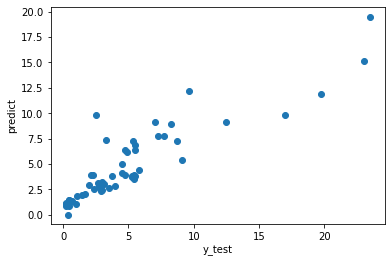

In [115]:
plt.scatter(y_test,pred)
plt.xlabel('y_test')
plt.ylabel('predict')
plt.show()

C:\Users\2211582\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


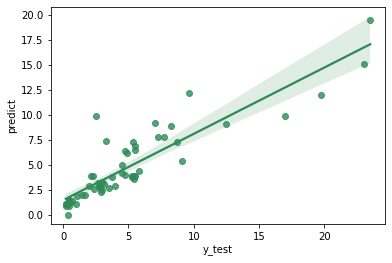

In [116]:
sns.regplot(y_test,pred,color='seagreen')
plt.xlabel('y_test')
plt.ylabel('predict')
plt.show()

<AxesSubplot:>

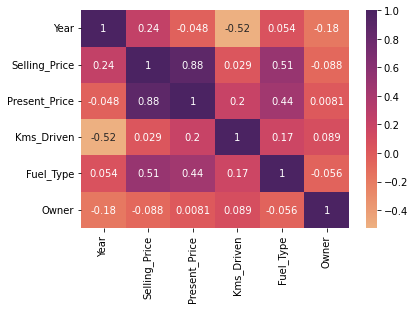

In [117]:
sns.heatmap(plst.corr(),annot=True,cmap='flare')

array([[<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Selling_Price'}>],
       [<AxesSubplot:title={'center':'Present_Price'}>,
        <AxesSubplot:title={'center':'Kms_Driven'}>],
       [<AxesSubplot:title={'center':'Fuel_Type'}>,
        <AxesSubplot:title={'center':'Owner'}>]], dtype=object)

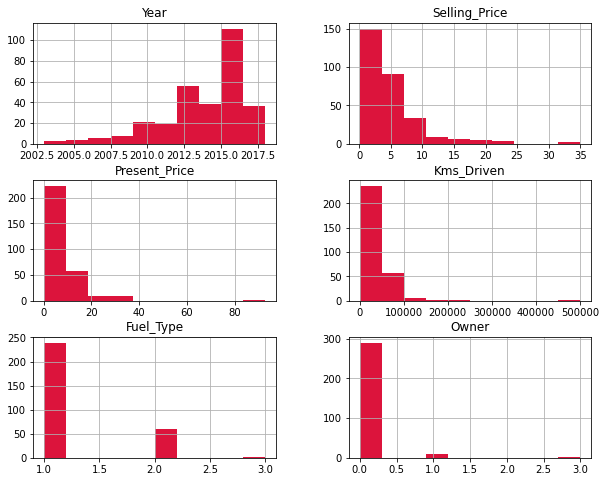

In [118]:
plst.hist(figsize=(10,8),color='crimson')

In [119]:
pred

array([ 2.90799492,  9.85100774,  2.44996303,  2.64081556,  2.02011037,
        1.39527001, 15.11033425,  1.07236398,  6.4314518 ,  9.09333055,
        3.16021346,  1.09044229,  8.89490581,  1.49685334,  1.26885444,
        0.87771403, 12.15780149,  1.45937863,  7.28978622,  9.18067985,
        4.40890626,  3.88250338,  7.7732584 ,  2.29894721,  0.91764545,
        1.26415938, 19.4945031 ,  3.95588217,  5.39633303,  6.15294588,
        1.10623537,  6.42324717,  0.03123086,  2.65929311,  4.13813461,
        9.83095259,  2.87408023,  3.55254097,  3.76528416,  1.12800274,
        1.38250293,  7.26816391,  3.86973826,  2.90832672,  3.23797055,
        3.89058504,  6.84740819,  2.82532281,  3.81190607,  1.23528713,
        1.98621863,  2.57274172,  7.41282062,  3.91278726,  7.74935888,
        1.83622168, 11.92689815,  1.15735856,  3.06543894,  3.85167803,
        5.01923753])

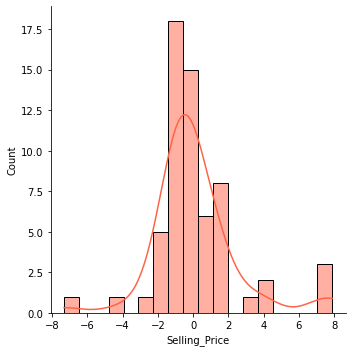

In [120]:
sns.displot((y_test-pred),kde=True,color='tomato')

INTERPRETATION:
 As the residuals are normally distributed, the linear regression model fits this dataset   



# Scoring

In [121]:
linreg.score(x_test,y_test)

0.7824930623269296

Thus the scoring reveals the accuracy of the linear regression model used for the dataset
Scoring for the linear regression model is 78%.    

# Residuals

In [122]:
from sklearn import metrics

In [123]:
metrics.mean_absolute_error(y_test,pred)

1.5148595635468562

In [124]:
metrics.mean_squared_error(y_test,pred)

5.686291844698151

In [125]:
np.sqrt(metrics.mean_absolute_error(y_test,pred))

1.2307963127775676